## Loading Modules

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#### Modifying display so that rows take up greater screen width

In [58]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [59]:
import warnings
warnings.filterwarnings('ignore')

#### Setting maximum number of rows and columns to display

In [60]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

#### Loading dataset

In [61]:
entire_df = pd.read_csv('creditcard.csv')

In [62]:
len(entire_df)

284807

##  Splitting the data into train and test set

### Since we are not provided with the test dataset, let us split the data in stratified version so that we can have a test set to evaluate our final model performance

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = entire_df.drop('Class', axis=1)
y = entire_df['Class']

#### 15% of data is kept as test data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

Concatenating X_train and y_train to data_df. We will be doing EDA on this data

In [66]:
data_df = pd.concat([X_train, y_train], axis=1)

In [68]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
200163,133314.0,1.941643,-0.038282,-0.966428,0.960146,0.327545,0.180164,-0.135851,0.120205,0.303787,0.372858,0.513038,0.666249,-0.445937,0.587421,-0.041735,0.570878,-0.984095,0.074934,0.116277,-0.211664,-0.403067,-1.253887,0.454875,0.091459,-0.429933,-1.204608,0.015728,-0.035624,22.70,0
213612,139324.0,-0.005940,0.682225,1.156806,-0.366482,0.020250,-0.527707,0.488761,-0.269655,0.769370,-1.085772,-0.360526,0.586299,1.426232,-2.113363,0.442996,0.656272,-0.018127,0.667906,-0.678521,-0.004025,0.029058,0.429739,-0.012936,-0.041599,-0.627909,-0.559551,-0.132118,-0.136027,24.06,0
171670,120761.0,2.051997,-1.021249,-1.614582,-0.895923,-0.372244,0.137097,-1.110539,0.221054,0.081001,0.260519,0.414013,-1.200951,-1.345815,-1.636816,-0.039111,2.140698,0.963172,0.453754,0.723053,0.093165,0.251753,0.561994,0.010408,-0.255067,-0.143741,-0.087490,0.002240,-0.017488,69.99,0
213348,139219.0,0.111118,0.322087,2.544761,3.816292,-0.976273,1.755117,-0.926401,-0.346962,0.258451,0.498003,-2.044141,0.723808,1.006587,-1.460108,-2.621551,0.572457,-0.296849,-0.084312,-1.185995,-0.124448,0.919341,0.534588,-0.003164,0.085257,0.304173,0.180409,0.299991,0.311537,74.94,0
139105,83014.0,-3.539198,-1.606380,1.688222,1.906984,-0.009767,-0.980564,-1.513664,1.154045,-0.226565,-0.879769,-0.348920,0.653591,0.037940,0.565611,1.168190,-0.237788,0.754822,-0.177907,-0.074464,0.367532,0.360743,0.086505,-0.542958,0.669036,-0.019870,-0.339450,-0.205104,-0.418773,4.75,0


Concatenating X_test and y_test to data_df

In [102]:
test_df = pd.concat([X_test, y_test], axis=1)

## Exploratory Data Analysis

In [69]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242085 entries, 200163 to 17451
Data columns (total 31 columns):
Time      242085 non-null float64
V1        242085 non-null float64
V2        242085 non-null float64
V3        242085 non-null float64
V4        242085 non-null float64
V5        242085 non-null float64
V6        242085 non-null float64
V7        242085 non-null float64
V8        242085 non-null float64
V9        242085 non-null float64
V10       242085 non-null float64
V11       242085 non-null float64
V12       242085 non-null float64
V13       242085 non-null float64
V14       242085 non-null float64
V15       242085 non-null float64
V16       242085 non-null float64
V17       242085 non-null float64
V18       242085 non-null float64
V19       242085 non-null float64
V20       242085 non-null float64
V21       242085 non-null float64
V22       242085 non-null float64
V23       242085 non-null float64
V24       242085 non-null float64
V25       242085 non-null float64
V

In [7]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
data_df['Time'].describe()

count    242085.000000
mean      94839.743607
std       47509.881989
min           0.000000
25%       54182.000000
50%       84731.000000
75%      139344.000000
max      172792.000000
Name: Time, dtype: float64

In [71]:
172792 / 3600

47.99777777777778

#### Visualize fraud transactions and non-fraud transactions separately

In [72]:
fraud_df = data_df[data_df.Class == 1]

In [73]:
real_df = data_df[data_df.Class == 0]

In [74]:
fraud_frac = len(fraud_df) / len(data_df)
print('Percentage of fraud samples: {0}'.format(fraud_frac*100))

Percentage of fraud samples: 0.17266662535886157


In [75]:
real_frac = len(real_df) / len(data_df)
print('Percentage of real samples: {0}'.format(real_frac*100))

Percentage of real samples: 99.82733337464114


#### Amount distribution for fraud samples and real samples

In [76]:
fraud_df['Amount'].describe()

count     418.000000
mean      124.595718
std       269.998963
min         0.000000
25%         1.000000
50%         7.590000
75%       104.030000
max      2125.870000
Name: Amount, dtype: float64

In [96]:
fraud_df['Amount'].quantile(0.95)

717.6974999999999

In [77]:
real_df['Amount'].describe()

count    241667.000000
mean         88.421535
std         251.941483
min           0.000000
25%           5.690000
50%          22.000000
75%          77.090000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Real')

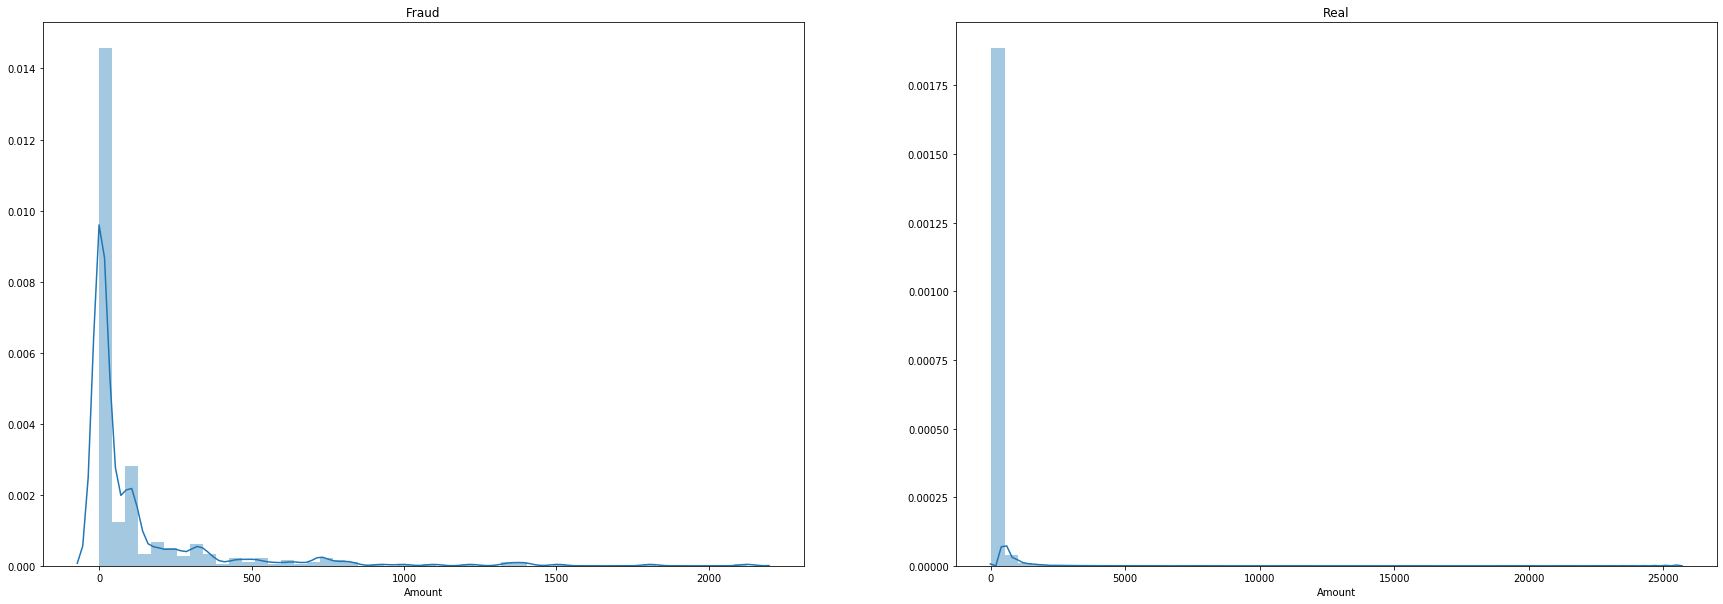

In [78]:
fig, axs = plt.subplots(1,2,figsize=(30,10))
sns.distplot(fraud_df['Amount'], ax = axs[0],label='fraud').set_title('Fraud')
sns.distplot(real_df['Amount'], ax = axs[1], label='real').set_title('Real')

Text(0.5, 1.0, 'All Data')

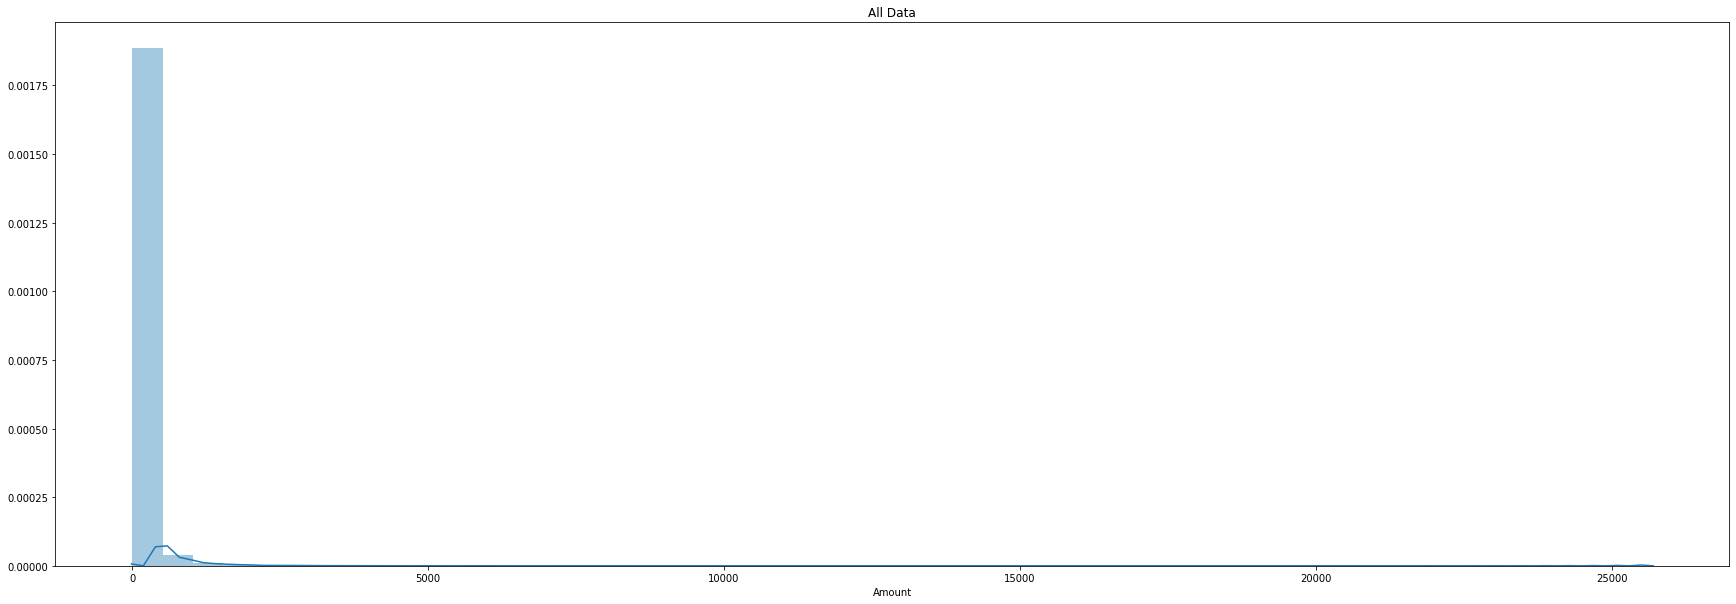

In [79]:
fig, axs = plt.subplots(figsize=(30,10))
sns.distplot(data_df['Amount'], label='All Data').set_title('All Data')

#### Let's visualize skew in Amount

In [80]:
from scipy import stats, special

In [81]:
stats.skew(data_df['Amount'])

17.852921420927082

So Amount is highly skewed

### Let's visualize the features V1...V28

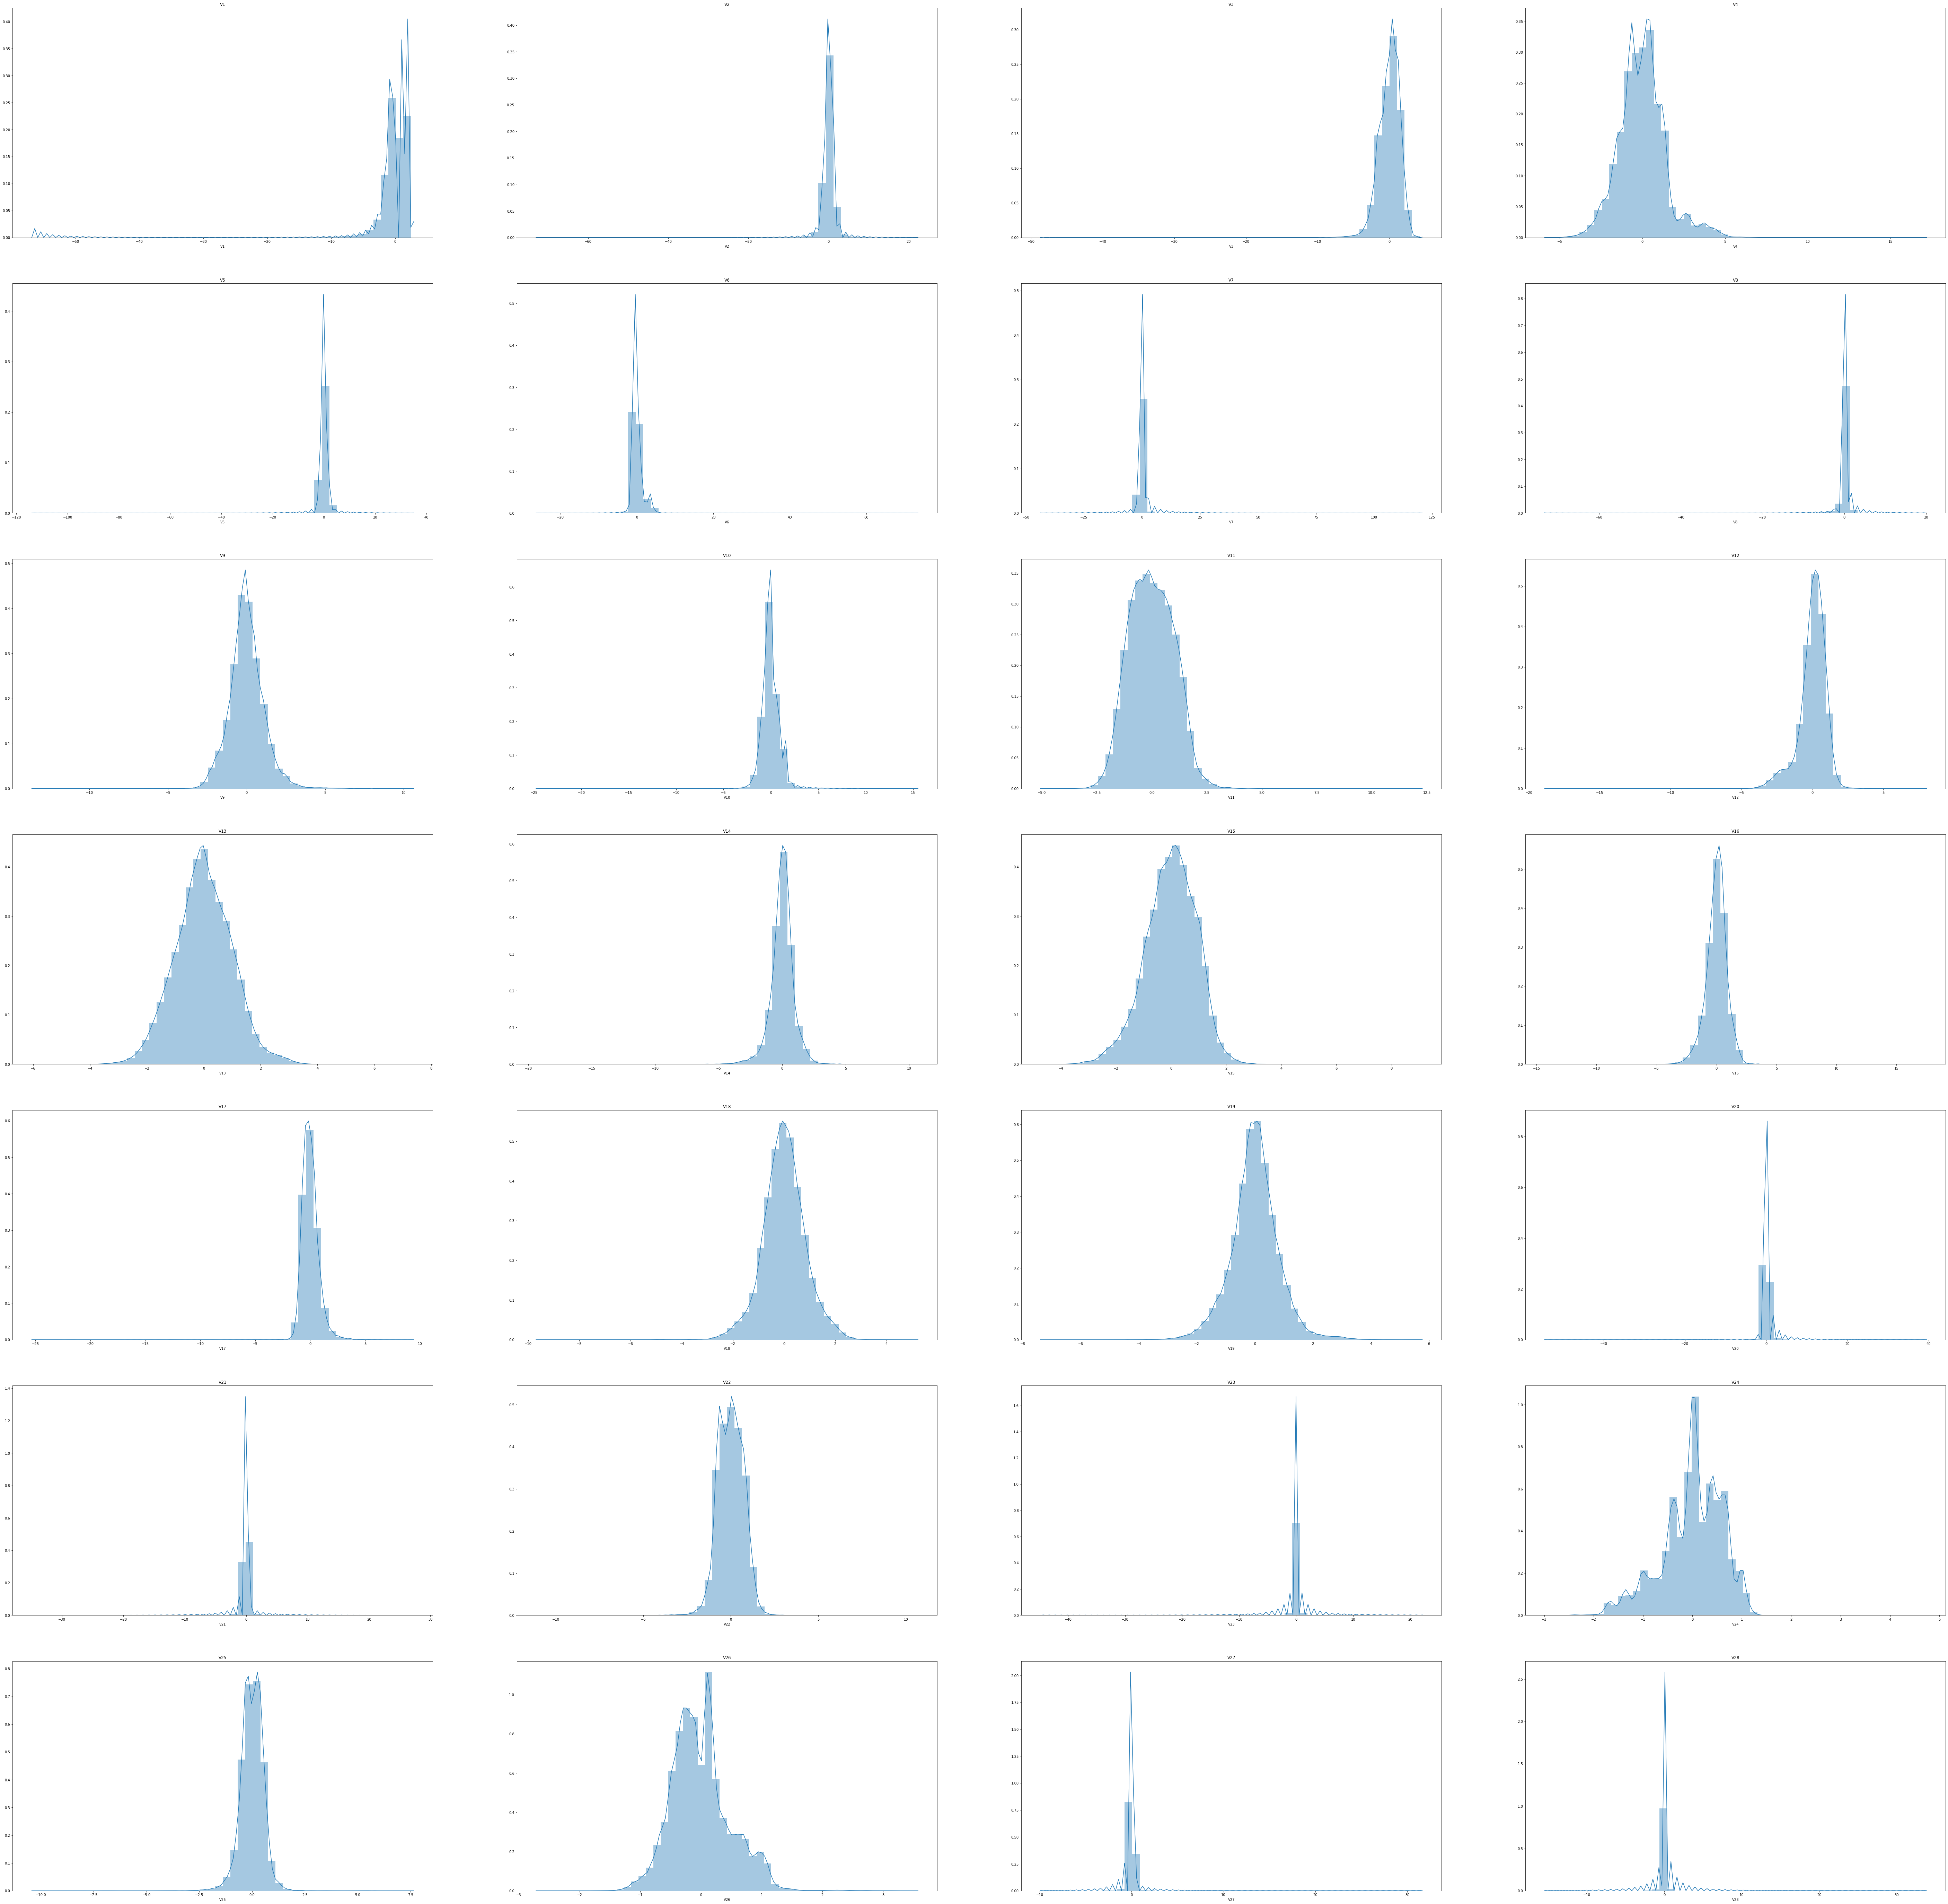

In [82]:
fig, axs = plt.subplots(7, 4, figsize=(100,100))
b = 0
for i in range(1, 8):
    for j in range(1, 5):
        b+=1
        var_str = 'V'+str(b)
        sns.distplot(data_df[var_str], ax = axs[i-1][j-1], label = var_str).set_title(var_str)

#### Let's visualize the skew in features V1....V28

In [83]:
skew_dict = {'Var':[], 'Skew':[]}
for i in data_df.columns[1:-1]:
    skew_dict['Var'].append(i)
    skew_dict['Skew'].append(abs(stats.skew(data_df[i])))
    #print("{0} _> {1}".format(i, stats.skew(data_df[i])))
skew_df = pd.DataFrame(skew_dict).sort_values(by='Skew', ascending = False)
skew_df = skew_df.set_index('Var')

In [84]:
skew_df

,Skew
Var,
Amount,17.852921
V28,12.230882
V8,8.424840
V23,6.387249
V2,4.583147
V17,3.755215
V21,3.499283
V7,3.302096
V1,3.235577


### Visualize the correlation matrix

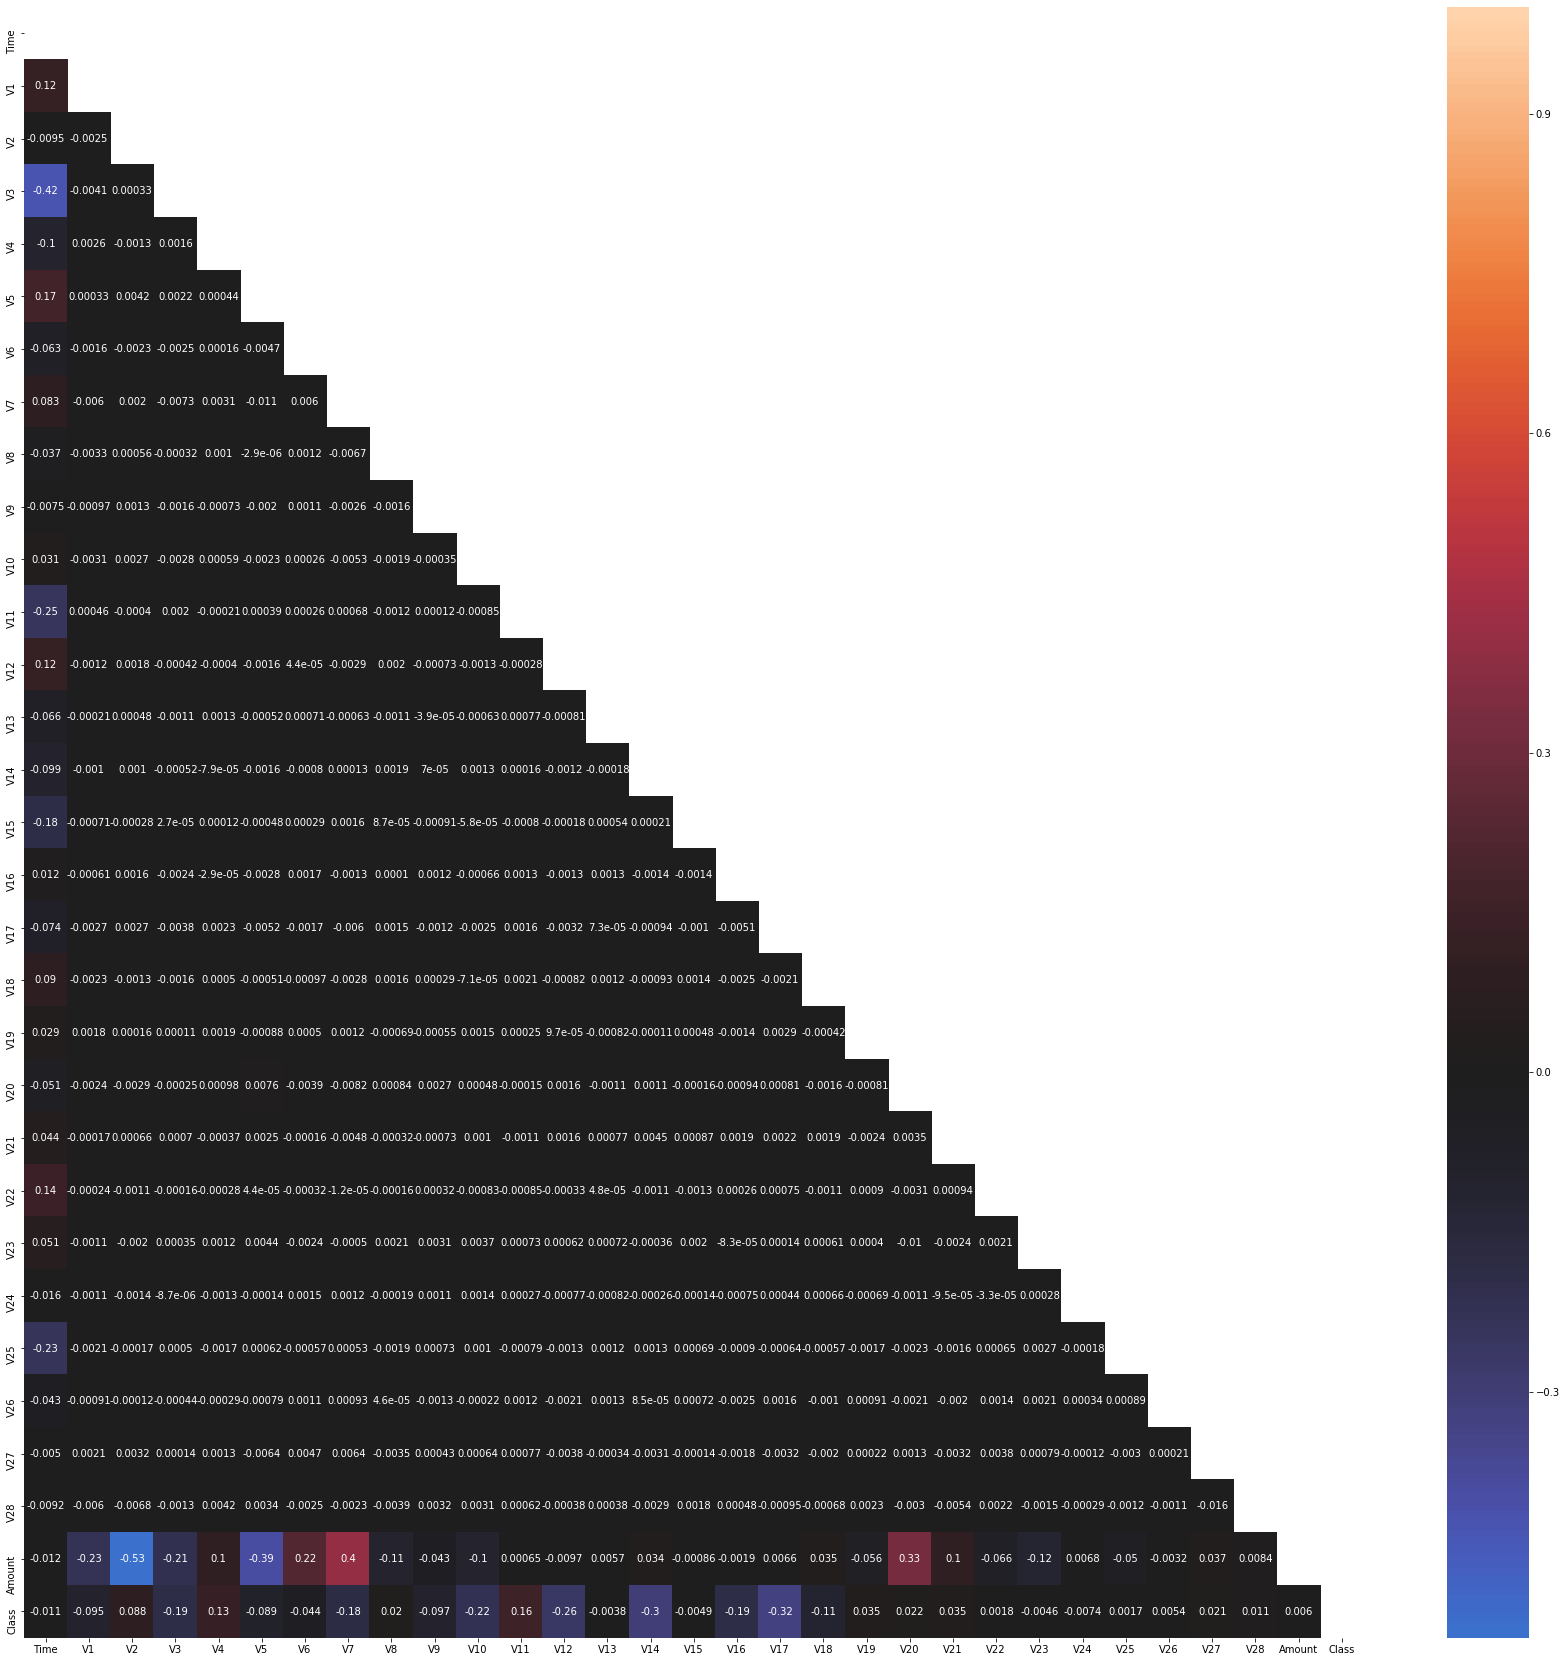

In [85]:
plt.subplots(figsize=(30,30))
mask = np.zeros_like(data_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_df.corr(), annot=True, mask=mask, center=0)

V2 and Amount are negatively correlated and V7 and Amount are positively correlated

### Visualize the fraud and real cases by hour(for each hour in two days) and see if there is any pattern

In [86]:
import math

#### Fraud

In [87]:
fraud_hourly = fraud_df['Time'].map(lambda x: math.floor(x/3600)%24)

In [88]:
fraud_df['Hour'] = fraud_hourly

In [89]:
fraud_df['Hour'] = fraud_df['Hour'].astype('str')

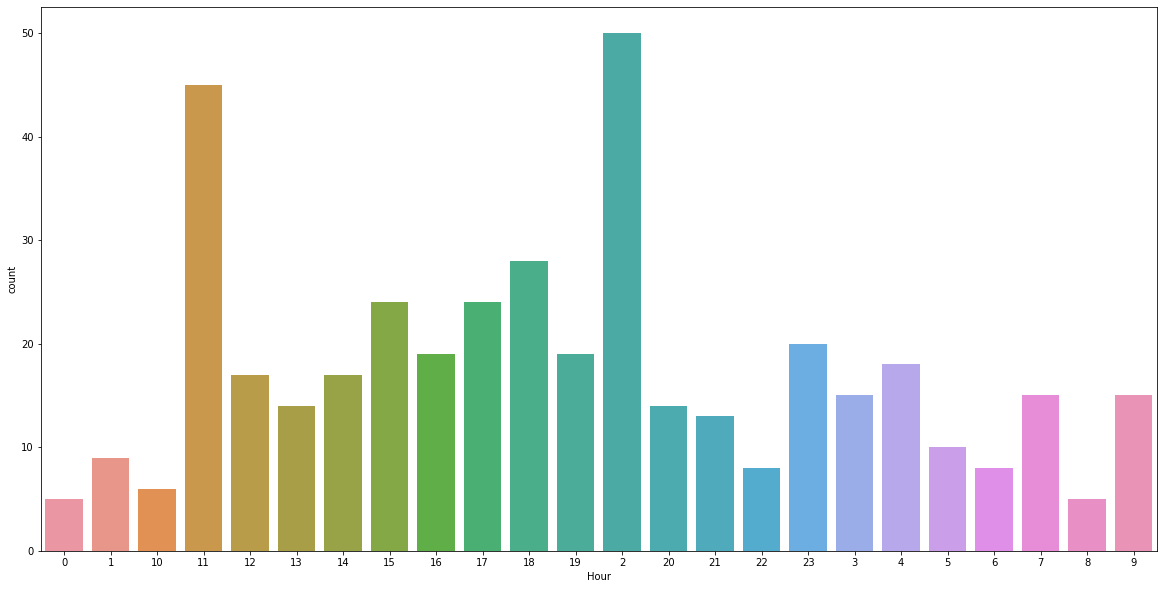

In [90]:
plt.subplots(figsize=(20, 10))
sns.countplot(x='Hour', data=fraud_df)

It appears fraud cases have been maximum in hour 11 and hour 2

#### Real

In [91]:
real_hourly = real_df['Time'].map(lambda x: math.floor(x/3600)%24)

In [92]:
real_df['Hour'] = real_hourly

In [93]:
real_df['Hour'] = real_df['Hour'].astype('str')

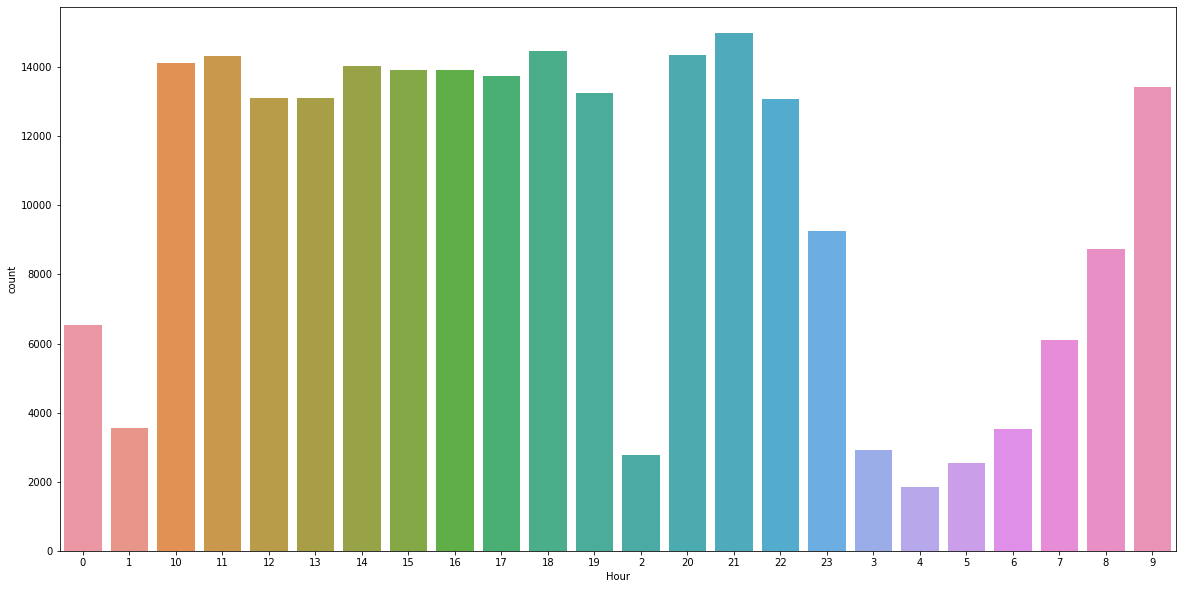

In [94]:
plt.subplots(figsize=(20, 10))
sns.countplot(x='Hour', data=real_df)

# Feature Engineering

#### 95% of fraud cases involve amount less than $720. Above this, fraud cases are extremely small. We will create an indicator variable indicating this.

In [106]:
data_df['isFraudAmount'] = data_df['Amount'].map(lambda x: '1' if x < 720  else '0')

In [107]:
data_df['isFraudAmount'] 

200163    1
213612    1
171670    1
213348    1
139105    1
175411    1
217521    1
27378     1
58035     1
1244      1
237369    1
242696    0
179068    1
181443    1
1987      1
208009    1
109822    1
71258     1
71197     1
49989     1
99436     1
199197    1
97579     1
131595    1
20577     1
3555      1
77657     1
62714     1
237753    1
87744     1
220407    1
259885    1
189325    1
91996     1
266553    1
40229     1
270488    1
198260    1
26378     1
271399    1
40761     1
266967    1
15900     1
268752    1
55331     1
80487     1
224444    1
94947     1
222116    1
223558    1
29559     0
223128    1
273783    1
278385    1
228589    1
8795      1
105683    1
47013     1
16515     1
149046    1
198609    1
111395    1
138642    1
219077    1
276959    1
185077    1
125739    1
222658    1
136316    1
143092    1
179212    0
148628    1
260453    1
131882    1
54619     1
135226    1
35087     1
282810    1
53263     1
173914    1
258248    1
216183    1
131187    1
2009

In [108]:
test_df['isFraudAmount'] = test_df['Amount'].map(lambda x: '1' if x < 720  else '0')

#### Create hour feature

In [109]:
data_df['Hour'] = data_df['Time'].map(lambda x: math.floor(x/3600)%24)

In [110]:
data_df['Hour'] = data_df['Hour'].astype('str')

In [111]:
test_df['Hour'] = test_df['Time'].map(lambda x: math.floor(x/3600)%24)

In [112]:
test_df['Hour'] = test_df['Hour'].astype('str')

#### Hour 2 and 11 accounts for large number of fraud cases. So we'll create an indicator function for that.

In [113]:
data_df['isFraudHour'] = data_df['Hour'].map(lambda x: 1 if x=='2' or x=='11' else '0')

In [114]:
test_df['isFraudHour'] = test_df['Hour'].map(lambda x: 1 if x=='2' or x=='11' else '0')

In [115]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,isFraudAmount,Hour,isFraudHour
200163,133314.0,1.941643,-0.038282,-0.966428,0.960146,0.327545,0.180164,-0.135851,0.120205,0.303787,0.372858,0.513038,0.666249,-0.445937,0.587421,-0.041735,0.570878,-0.984095,0.074934,0.116277,-0.211664,-0.403067,-1.253887,0.454875,0.091459,-0.429933,-1.204608,0.015728,-0.035624,22.70,0,1,13,0
213612,139324.0,-0.005940,0.682225,1.156806,-0.366482,0.020250,-0.527707,0.488761,-0.269655,0.769370,-1.085772,-0.360526,0.586299,1.426232,-2.113363,0.442996,0.656272,-0.018127,0.667906,-0.678521,-0.004025,0.029058,0.429739,-0.012936,-0.041599,-0.627909,-0.559551,-0.132118,-0.136027,24.06,0,1,14,0
171670,120761.0,2.051997,-1.021249,-1.614582,-0.895923,-0.372244,0.137097,-1.110539,0.221054,0.081001,0.260519,0.414013,-1.200951,-1.345815,-1.636816,-0.039111,2.140698,0.963172,0.453754,0.723053,0.093165,0.251753,0.561994,0.010408,-0.255067,-0.143741,-0.087490,0.002240,-0.017488,69.99,0,1,9,0
213348,139219.0,0.111118,0.322087,2.544761,3.816292,-0.976273,1.755117,-0.926401,-0.346962,0.258451,0.498003,-2.044141,0.723808,1.006587,-1.460108,-2.621551,0.572457,-0.296849,-0.084312,-1.185995,-0.124448,0.919341,0.534588,-0.003164,0.085257,0.304173,0.180409,0.299991,0.311537,74.94,0,1,14,0
139105,83014.0,-3.539198,-1.606380,1.688222,1.906984,-0.009767,-0.980564,-1.513664,1.154045,-0.226565,-0.879769,-0.348920,0.653591,0.037940,0.565611,1.168190,-0.237788,0.754822,-0.177907,-0.074464,0.367532,0.360743,0.086505,-0.542958,0.669036,-0.019870,-0.339450,-0.205104,-0.418773,4.75,0,1,23,0
175411,122323.0,2.059480,-0.084842,-1.686949,0.608703,0.160350,-1.307184,0.474134,-0.395946,0.522709,0.157976,-1.215923,-0.259006,-1.156521,0.628792,-0.334027,-0.485885,-0.085927,-0.624959,0.198513,-0.278371,-0.040158,0.016415,0.049350,-0.086928,0.196069,0.388502,-0.092992,-0.074910,20.99,0,1,9,0
217521,140922.0,-4.437018,-4.091658,1.796803,-0.596522,1.612884,-0.709529,-0.037831,-1.578658,1.879165,-0.068531,-0.576932,-0.642278,-0.462359,-1.152717,1.796574,0.299759,-0.730959,0.176330,1.111475,-2.187759,-0.189581,0.252763,1.854384,0.746232,0.733042,0.806791,0.464336,-1.040099,186.83,0,1,15,0
27378,34529.0,1.010061,-0.203055,2.392444,3.155609,-1.567273,0.778954,-1.229159,0.432806,1.144379,0.238221,-1.375969,0.562019,-0.221433,-1.251335,-1.922334,0.018885,0.208870,-0.183765,-0.670592,-0.181665,0.087180,0.717450,-0.078738,0.765861,0.423236,0.229957,0.093177,0.043924,9.96,0,1,9,0
58035,48200.0,-0.008460,0.746464,0.277555,0.724864,1.380730,0.899024,0.891160,0.097606,-0.442145,0.211541,0.566188,0.411181,0.180690,0.352135,1.756977,-1.919274,0.937289,-2.121229,-1.170089,0.063310,0.223562,1.149537,0.156030,-0.940181,-1.031658,-0.316973,0.340449,-0.003530,19.99,0,1,13,0
1244,958.0,-0.719718,0.554267,1.360340,1.254272,0.563760,-0.169305,0.503742,0.000207,-0.309705,-0.229778,-0.592073,0.442262,0.307306,-0.084623,-0.013739,-1.123718,0.472085,-0.763433,0.443737,0.006155,0.059812,0.340661,-0.041383,0.110783,-0.253031,-0.332291,0.040540,0.234741,25.28,0,1,0,0


In [116]:
len(data_df)

242085

#### For now we are not using Hour feature. In some other experiment we might use it.

In [166]:
data_df = data_df.drop(['Hour', 'Time'], axis=1)
test_df = test_df.drop(['Hour', 'Time'], axis=1)

# Modeling

#### Converting the object type to one-hot encoding

In [167]:
len(data_df)

242085

In [168]:
len(test_df)

42722

In [169]:
data_df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,isFraudAmount,isFraudHour
200163,1.941643,-0.038282,-0.966428,0.960146,0.327545,0.180164,-0.135851,0.120205,0.303787,0.372858,0.513038,0.666249,-0.445937,0.587421,-0.041735,0.570878,-0.984095,0.074934,0.116277,-0.211664,-0.403067,-1.253887,0.454875,0.091459,-0.429933,-1.204608,0.015728,-0.035624,22.70,0,1,0
213612,-0.005940,0.682225,1.156806,-0.366482,0.020250,-0.527707,0.488761,-0.269655,0.769370,-1.085772,-0.360526,0.586299,1.426232,-2.113363,0.442996,0.656272,-0.018127,0.667906,-0.678521,-0.004025,0.029058,0.429739,-0.012936,-0.041599,-0.627909,-0.559551,-0.132118,-0.136027,24.06,0,1,0


In [170]:
concat_df = pd.concat([data_df, test_df], ignore_index=True)

In [171]:
concat_df = pd.get_dummies(concat_df, drop_first = True)

In [172]:
concat_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,isFraudAmount_1,isFraudHour_0
0,1.941643,-0.038282,-0.966428,0.960146,0.327545,0.180164,-0.135851,0.120205,0.303787,0.372858,0.513038,0.666249,-0.445937,0.587421,-0.041735,0.570878,-0.984095,0.074934,0.116277,-0.211664,-0.403067,-1.253887,0.454875,0.091459,-0.429933,-1.204608,0.015728,-0.035624,22.70,0,1,1
1,-0.005940,0.682225,1.156806,-0.366482,0.020250,-0.527707,0.488761,-0.269655,0.769370,-1.085772,-0.360526,0.586299,1.426232,-2.113363,0.442996,0.656272,-0.018127,0.667906,-0.678521,-0.004025,0.029058,0.429739,-0.012936,-0.041599,-0.627909,-0.559551,-0.132118,-0.136027,24.06,0,1,1
2,2.051997,-1.021249,-1.614582,-0.895923,-0.372244,0.137097,-1.110539,0.221054,0.081001,0.260519,0.414013,-1.200951,-1.345815,-1.636816,-0.039111,2.140698,0.963172,0.453754,0.723053,0.093165,0.251753,0.561994,0.010408,-0.255067,-0.143741,-0.087490,0.002240,-0.017488,69.99,0,1,1
3,0.111118,0.322087,2.544761,3.816292,-0.976273,1.755117,-0.926401,-0.346962,0.258451,0.498003,-2.044141,0.723808,1.006587,-1.460108,-2.621551,0.572457,-0.296849,-0.084312,-1.185995,-0.124448,0.919341,0.534588,-0.003164,0.085257,0.304173,0.180409,0.299991,0.311537,74.94,0,1,1
4,-3.539198,-1.606380,1.688222,1.906984,-0.009767,-0.980564,-1.513664,1.154045,-0.226565,-0.879769,-0.348920,0.653591,0.037940,0.565611,1.168190,-0.237788,0.754822,-0.177907,-0.074464,0.367532,0.360743,0.086505,-0.542958,0.669036,-0.019870,-0.339450,-0.205104,-0.418773,4.75,0,1,1


In [173]:
data_df2 = concat_df[:242085]
test_df2 = concat_df[242085:]

In [174]:
len(data_df2)

242085

In [175]:
len(test_df2)

42722

In [176]:
data_df2.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,isFraudAmount_1,isFraudHour_0
0,1.941643,-0.038282,-0.966428,0.960146,0.327545,0.180164,-0.135851,0.120205,0.303787,0.372858,0.513038,0.666249,-0.445937,0.587421,-0.041735,0.570878,-0.984095,0.074934,0.116277,-0.211664,-0.403067,-1.253887,0.454875,0.091459,-0.429933,-1.204608,0.015728,-0.035624,22.70,0,1,1
1,-0.005940,0.682225,1.156806,-0.366482,0.020250,-0.527707,0.488761,-0.269655,0.769370,-1.085772,-0.360526,0.586299,1.426232,-2.113363,0.442996,0.656272,-0.018127,0.667906,-0.678521,-0.004025,0.029058,0.429739,-0.012936,-0.041599,-0.627909,-0.559551,-0.132118,-0.136027,24.06,0,1,1


## Modeling on the original dataset

### Preparing training and test data

In [177]:
X_train2 = data_df2.drop('Class', axis=1)
y_train2 = data_df2['Class']
X_test2 = test_df2.drop('Class', axis=1)
y_test2 = test_df2['Class']

### Fitting DecisionTreeClassifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
from sklearn.model_selection import RandomizedSearchCV

In [185]:
from sklearn.model_selection import StratifiedKFold

#### Creating a cross-validation object

In [186]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

#### Different Hyperparameter values to explore

In [187]:
n_estimators = [100, 500, 800, 1500, 2500, 5000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [5, 7, 8, 10, 12, 15, 20]
min_samples_split = [2,5,8, 10, 15, 20]
min_samples_leaf = [1, 2,5,8,10, 15, 20]

Hyperparameters Dictionary

In [193]:
grid_params_dtc = {
    "max_features":['auto', 'sqrt', 'log2'],
    "max_depth":list(np.arange(5,51,3))+[None],
    "min_samples_split":np.arange(2, 22, 2),
    "min_samples_leaf": np.arange(1, 22),
    "criterion":['gini', 'entropy'],
    "splitter": ['best', 'random']
}

In [194]:
dtc = DecisionTreeClassifier(random_state=42)

#### Performing Randomized Cross Validation. Here the scoring metrics is taken as roc_auc i.e area under precision-recall curve

In [195]:
dtc_cv = RandomizedSearchCV(dtc, grid_params_dtc, n_iter = 10, scoring='roc_auc', n_jobs=-1, verbose=10, random_state=42, cv=cv)

In [196]:
dtc_cv.fit(X_train2, y_train2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='roc_a

In [197]:
dtc_cv.best_score_

0.9231853924566037

In [199]:
dtc_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

#### Creating a new Decision Tree Classifier with best hyperparameter values obtained from cross-validation and training it on entire trainng dataset

In [201]:
dtc_best = DecisionTreeClassifier(**dtc_cv.best_params_)

In [202]:
dtc_best.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=4)

### To report the performance on Test Data we will use various metrics

#### Area under ROC curve

In [200]:
from sklearn.metrics import roc_auc_score

In [204]:
roc_auc_score(y_test2, dtc_best.predict_proba(X_test2)[:, 1])

0.9390722672588178

#### Classification report detailing precision, recall and f1 score of each class

In [321]:
from sklearn.metrics import classification_report

In [323]:
print(classification_report(y_test2, dtc_best.predict(X_test2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.85      0.69      0.76        74

    accuracy                           1.00     42722
   macro avg       0.92      0.84      0.88     42722
weighted avg       1.00      1.00      1.00     42722



#### Area under Precision Recall curve

In [362]:
from sklearn.metrics import precision_recall_curve, auc

In [363]:
precision, recall, thresholds = precision_recall_curve(y_test2, dtc_best.predict_proba(X_test2)[:,1])

In [364]:
auc_pr = auc(recall, precision)

In [365]:
auc_pr

0.7698832316339999

### Cross vamlidation of Decision Tree Classifier using f1_score

In [ ]:
dtc2 = DecisionTreeClassifier(random_state=42)

In [349]:
dtc_cv2 = RandomizedSearchCV(dtc2, grid_params_dtc, n_iter = 10, scoring='f1', n_jobs=-1, verbose=10, random_state=42, cv=cv)

In [351]:
dtc_cv2.fit(X_train2, y_train2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1', 

In [353]:
dtc_cv2.best_score_

0.789235227551017

In [354]:
dtc2_best = DecisionTreeClassifier(**dtc_cv2.best_params_)

In [355]:
dtc2_best.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=4)

#### area under roc curve

In [356]:
roc_auc_score(y_test2, dtc2_best.predict_proba(X_test2)[:, 1])

0.9462301708010767

#### Precision, recall and f1 score

In [358]:
print(classification_report(y_test2, dtc2_best.predict(X_test2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.88      0.62      0.73        74

    accuracy                           1.00     42722
   macro avg       0.94      0.81      0.86     42722
weighted avg       1.00      1.00      1.00     42722



In [359]:
precision, recall, thresholds = precision_recall_curve(y_test2, dtc2_best.predict_proba(X_test2)[:,1])

#### Area under precision-recall curve

In [360]:
auc_pr = auc(recall, precision)

In [361]:
auc_pr

0.7116594766130361

### Oversampling using SMOTE

#### We will oversample the minority class so as to remove the class imbalance and train the DecisionTreeClassifier on the oversampled dataset

In [209]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [210]:
over = SMOTE()

In [225]:
steps = [('over', SMOTE()), ('dtc', DecisionTreeClassifier(random_state=42))]

In [226]:
pipeline = Pipeline(steps=steps)

#### Different parameter ranges. Note we are also trying different values of sampling_strategy

In [236]:
grid_params_dtc_over = {
    "over__sampling_strategy":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    "dtc__max_features":['auto', 'sqrt', 'log2'],
    "dtc__max_depth":list(np.arange(5,51,3))+[None],
    "dtc__min_samples_split":np.arange(2, 22, 2),
    "dtc__min_samples_leaf": np.arange(1, 22),
    "dtc__criterion":['gini', 'entropy'],
    "dtc__splitter": ['best', 'random']
}

In [237]:
dtc_over_cv = RandomizedSearchCV(pipeline, grid_params_dtc_over, n_iter = 10, scoring='roc_auc', n_jobs=-1, verbose=10, random_state=42, cv=cv)

In [238]:
dtc_over_cv.fit(X_train2, y_train2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('over', SMOTE()),
                                             ('dtc',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtc__criterion': ['gini', 'entropy'],
                                        'dtc__max_depth': [5, 8, 11, 14, 17, 20,
                                                           23, 26, 29, 32, 35,
                                                           38, 41, 44, 47, 50,
                                                           None],
                                        'dtc__max_features': ['auto', 'sqrt',
                                                              'log2'],
                                        'dtc__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       1

In [233]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'over', 'dtc', 'over__k_neighbors', 'over__n_jobs', 'over__random_state', 'over__sampling_strategy', 'dtc__ccp_alpha', 'dtc__class_weight', 'dtc__criterion', 'dtc__max_depth', 'dtc__max_features', 'dtc__max_leaf_nodes', 'dtc__min_impurity_decrease', 'dtc__min_impurity_split', 'dtc__min_samples_leaf', 'dtc__min_samples_split', 'dtc__min_weight_fraction_leaf', 'dtc__presort', 'dtc__random_state', 'dtc__splitter'])

In [334]:
best_params = dtc_over_cv.best_params_

In [335]:
best_params

{'over__sampling_strategy': 0.5,
 'dtc__splitter': 'random',
 'dtc__min_samples_split': 6,
 'dtc__min_samples_leaf': 17,
 'dtc__max_features': 'sqrt',
 'dtc__max_depth': 44,
 'dtc__criterion': 'gini'}

#### Defining and Training new sampler and classifier with best parameters

In [337]:
best_SMOTE = SMOTE(sampling_strategy=0.5)
best_decision_tree = DecisionTreeClassifier(splitter='random', random_state=42, min_samples_split=6, min_samples_leaf=17, max_features='sqrt', max_depth=44, criterion='gini')

In [339]:
best_steps = [('over', best_SMOTE), ('dtc', best_decision_tree)]
best_pipeline = Pipeline(steps=best_steps)

In [340]:
best_pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.5)),
                ('dtc',
                 DecisionTreeClassifier(max_depth=44, max_features='sqrt',
                                        min_samples_leaf=17,
                                        min_samples_split=6, random_state=42,
                                        splitter='random'))])

In [239]:
dtc_over_cv.best_score_

0.9376005635423829

#### roc_auc score

In [341]:
roc_auc_score(y_test2, best_pipeline.predict_proba(X_test2)[:,1])

0.9671648998463855

#### precision, recall and f1 score

In [347]:
print(classification_report(y_test2, best_pipeline.predict(X_test2)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42648
           1       0.11      0.89      0.19        74

    accuracy                           0.99     42722
   macro avg       0.55      0.94      0.59     42722
weighted avg       1.00      0.99      0.99     42722



#### Area under precision-recall curve

In [344]:
precision, recall, thresholds = precision_recall_curve(y_test2, best_pipeline.predict_proba(X_test2)[:,1])

In [345]:
auc_pr = auc(recall, precision)

In [346]:
auc_pr

0.7283027897142665

### Cross_validation using f1 score

In [368]:
steps = [('over', SMOTE()), ('dtc', DecisionTreeClassifier(random_state=42))]

In [369]:
pipeline = Pipeline(steps=steps)

In [370]:
dtc_over_cv = RandomizedSearchCV(pipeline, grid_params_dtc_over, n_iter = 10, scoring='f1', n_jobs=-1, verbose=10, random_state=42, cv=cv)

In [371]:
dtc_over_cv.fit(X_train2, y_train2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('over', SMOTE()),
                                             ('dtc',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtc__criterion': ['gini', 'entropy'],
                                        'dtc__max_depth': [5, 8, 11, 14, 17, 20,
                                                           23, 26, 29, 32, 35,
                                                           38, 41, 44, 47, 50,
                                                           None],
                                        'dtc__max_features': ['auto', 'sqrt',
                                                              'log2'],
                                        'dtc__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       1

In [372]:
best_params = dtc_over_cv.best_params_

In [377]:
dtc_over_cv.best_score_

0.40152148821778644

In [373]:
best_params

{'over__sampling_strategy': 0.7,
 'dtc__splitter': 'best',
 'dtc__min_samples_split': 20,
 'dtc__min_samples_leaf': 15,
 'dtc__max_features': 'sqrt',
 'dtc__max_depth': 23,
 'dtc__criterion': 'entropy'}

In [374]:
best_SMOTE = SMOTE(sampling_strategy=0.7)
best_decision_tree = DecisionTreeClassifier(splitter='best', random_state=42, min_samples_split=20, min_samples_leaf=15, max_features='sqrt', max_depth=23, criterion='entropy')

In [375]:
best_steps = [('over', best_SMOTE), ('dtc', best_decision_tree)]
best_pipeline = Pipeline(steps=best_steps)

In [376]:
best_pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.7)),
                ('dtc',
                 DecisionTreeClassifier(criterion='entropy', max_depth=23,
                                        max_features='sqrt',
                                        min_samples_leaf=15,
                                        min_samples_split=20,
                                        random_state=42))])

#### roc_auc score

In [378]:
roc_auc_score(y_test2, best_pipeline.predict_proba(X_test2)[:,1])

0.9514574366150055

#### precision, recall and f1 score

In [379]:
print(classification_report(y_test2, best_pipeline.predict(X_test2)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     42648
           1       0.22      0.88      0.36        74

    accuracy                           0.99     42722
   macro avg       0.61      0.94      0.68     42722
weighted avg       1.00      0.99      1.00     42722



#### Area under precision-recall curve

In [380]:
precision, recall, thresholds = precision_recall_curve(y_test2, best_pipeline.predict_proba(X_test2)[:,1])

In [381]:
auc_pr = auc(recall, precision)

In [382]:
auc_pr

0.6725000025758051